# EPA1333 - Computer Engineering for Scientific Computing
## Week 5 - Oct 5, 2016

**Python Data Science Handbook**

*Jake VanderPlas*

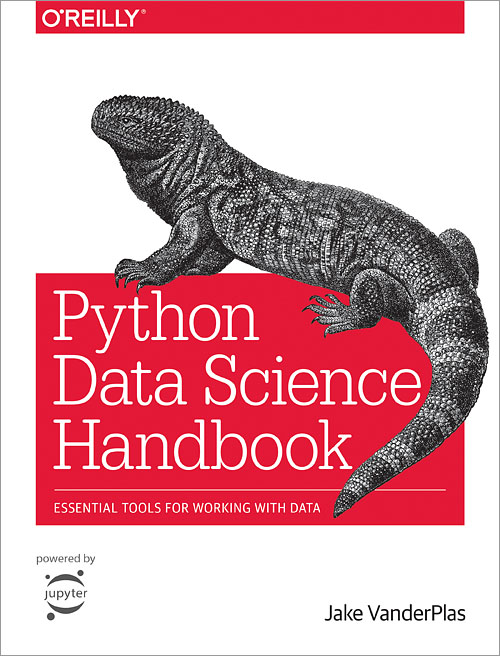

In [1]:
from IPython.core.display import Image
Image('https://covers.oreillystatic.com/images/0636920034919/lrg.jpg')

## Matplotlib 

Drawing plots, barchart. Some interaction is possible too.

Documentation: 
  * http://matplotlib.org/
  * [Beginners Guide](http://matplotlib.org/users/beginner.html)
  * [Examples](http://matplotlib.org/users/screenshots.html)
  * [scipy-lectures](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
 
 
  

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Optional, use a nice style of graphs
plt.style.use('ggplot')


array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81, 100])

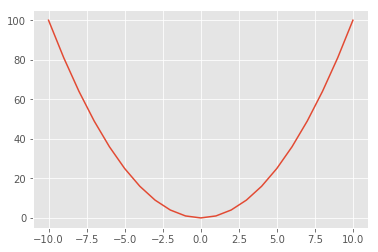

In [3]:
# plt.plot is the basic command
# plt.plot( X-axis, Y-axis, options... )

x = np.arange(-10,11)
y = x * x

plt.plot( x, y )
x
y

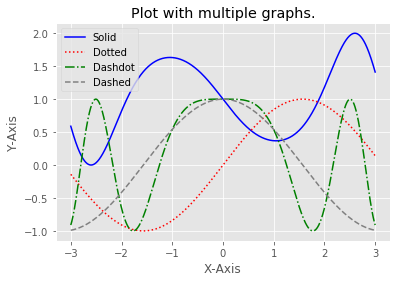

In [4]:
# Plotting multiple graphs in one plot

x = np.arange(-3,3,0.0001)

# sin(x- 2 sin x) + 1
ya = np.sin(x-2*np.sin(x))+1

yb1 = np.sin(x)
yb2 = np.cos(x*x)

yc = np.cos(np.abs(x))

# Plot multiple graphs
plt.plot( x, ya, color='blue', linestyle='-', label='Solid')
plt.plot( x, yb1, color='red', linestyle=':', label ='Dotted')
plt.plot( x, yb2, color='green', linestyle='-.', label='Dashdot')
plt.plot( x, yc, color='grey', linestyle='--', label='Dashed')

# Show a legend
plt.legend()

# Plot labels for X and Y axis
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Plot a title
plt.title("Plot with multiple graphs.")

### Generic view of matplotlib

A plot in matplotlib looks like this:

![matplotlib](matplotlib-figure.png)


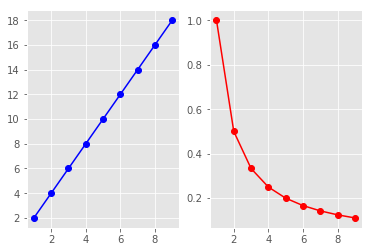

In [5]:
# Creating 2 plots side by side: subplots.

# Create a figure and 2 axes (each will contain a plot)
# The plots will be placed in a 1x2 grid (next to each other)
fig, (ax1, ax2) = plt.subplots( 1, 2 )


x=list(range(1,10))
y1 = [ 2*y for y in x ]
y2 = [ 1/y for y in x ]

# Plot each graph. The final argument is a short-cut for color, linestyle and markers.
ax1.plot( x, y1, "b-o")
ax2.plot( x, y2, "r-o")

# In Jupyter Notebook with matplotlib inline, plt.show() is not necessary
plt.show()

## Example: Hares, Lynx, Carrot

The file *population.txt* contains the populations over the years of
hares, lynxes and carrots.

  * What is the mean of the populations over the years?
  * In which year was the highest population for each species?
  * Which years have a population > 50,000 for any species?
 

In [6]:
# try to include the path
import os
os.listdir()
os.getcwd()

# try to find absulote path
import sys
print(sys.path)


['', 'C:\\Users\\Gebruiker\\Anaconda3\\python36.zip', 'C:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'C:\\Users\\Gebruiker\\Anaconda3\\lib', 'C:\\Users\\Gebruiker\\Anaconda3', 'C:\\Users\\Gebruiker\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Gebruiker\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.6-py3.6.egg', 'C:\\Users\\Gebruiker\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Gebruiker\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Gebruiker\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Gebruiker\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg', 'C:\\Users\\Gebruiker\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Gebruiker\\.ipython']


In [7]:
!cat populations.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# Read the file into an array using np.loadtxt()
population = np.loadtxt('populations.txt')
population

array([[  1900.,  30000.,   4000.,  48300.],
       [  1901.,  47200.,   6100.,  48200.],
       [  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1905.,  20600.,  41700.,  39800.],
       [  1906.,  18100.,  19000.,  38600.],
       [  1907.,  21400.,  13000.,  42300.],
       [  1908.,  22000.,   8300.,  44500.],
       [  1909.,  25400.,   9100.,  42100.],
       [  1910.,  27100.,   7400.,  46000.],
       [  1911.,  40300.,   8000.,  46800.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.],
       [  1916.,  11200.,  29700.,  36700.],
       [  1917.,   7600.,  15800.,  41800.],
       [  1918.,  14600.,   9700.,  43300.],
       [  1919.,  16200.,  10100.,  41300.],
       [  1920.,  24700.,   8600.,  47300.]])

In [9]:
# Get the transposition of the matrix, to get each column separately.
years, hares, lynxes, carrots = population.T
print( years )
print( hares )

[ 1900.  1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.
  1910.  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.
  1920.]
[ 30000.  47200.  70200.  77400.  36300.  20600.  18100.  21400.  22000.
  25400.  27100.  40300.  57000.  76600.  52300.  19500.  11200.   7600.
  14600.  16200.  24700.]


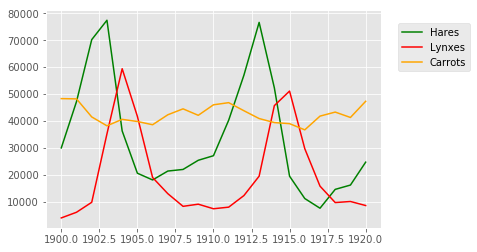

In [10]:
# Quickly plot them
plt.plot( years, hares, color='green', label='Hares')
plt.plot( years, lynxes, color='red', label='Lynxes')
plt.plot( years, carrots, color='orange', label='Carrots')

plt.legend(loc=((1.05,0.72)))

In [11]:
# Print the mean of the species, over the years
# Skip the first column (years)
population[:,1:].mean(axis=0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

In [12]:
# Find the year in which the species was highest.
year_highest_species = population.argmax(axis=0)
year_highest_species

array([20,  3,  4,  0], dtype=int64)

In [13]:
print("Highest Hare ", years[year_highest_species[1]], hares[year_highest_species[1]])
print("Highest Lynx ", years[year_highest_species[2]], lynxes[year_highest_species[2]])
print("Highest Carrot ", years[year_highest_species[3]], carrots[year_highest_species[3]])

Highest Hare  1903.0 77400.0
Highest Lynx  1904.0 59400.0
Highest Carrot  1900.0 48300.0


In [14]:
above50000 = np.any(population[:,1:] > 50000, axis=1)
print(years[above50000])
print(above50000)
population[above50000]


[ 1902.  1903.  1904.  1912.  1913.  1914.  1915.]
[False False  True  True  True False False False False False False False
  True  True  True  True False False False False False]


array([[  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.]])

### Interactive plots

We can make a variable interactive which we can use to make graphs interactive too.

In [15]:
from ipywidgets import interact

In [16]:
# You can make a function's argument interactive like this

def f(x):
    return x
    
interact(f, x=10)

<function __main__.f>

In [17]:
# Another way is to use the @ sign.

@interact(x=10)
def f(x):
    return x

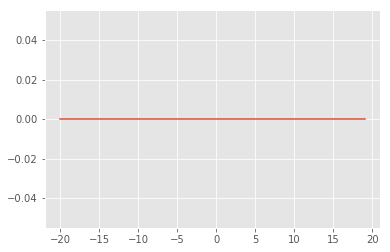

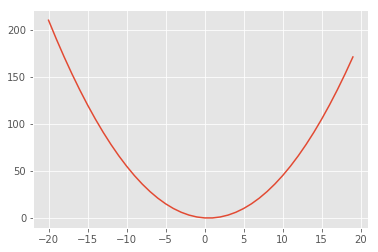

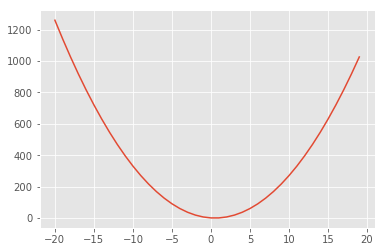

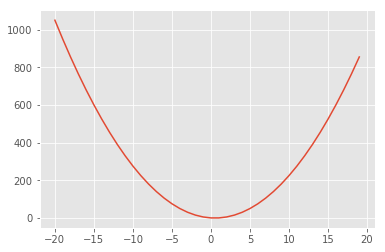

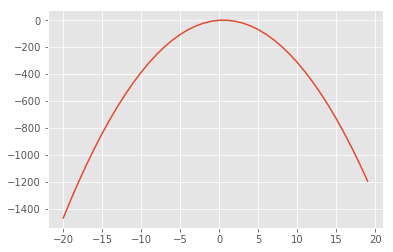

In [18]:
# Let's use this to make a plot interactive

@interact(a=(-10.0,10.0,0.5))
def h(a):
    l = [ x*x*a - a*x for x in range(-20,20,1)]
    t=list(range(-20,20))
    plt.plot(t,l)


In [10]:
@interact(x=10, y=20)
def h( x, y ):
    plt.axis( [-x,x,-y,y] )   # Set the limits of the axis
    plt.plot( [i for i in range(-10,10)],[ i*i for i in range(-10,10)])

A Jupyter Widget

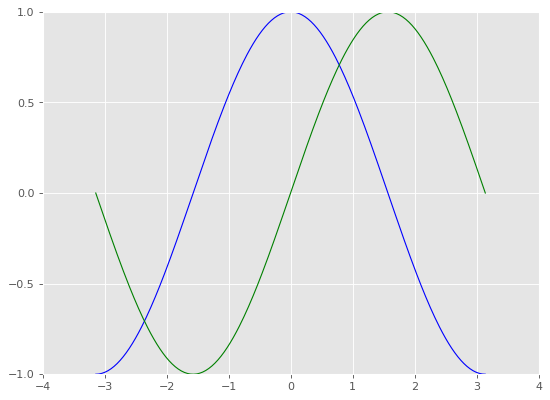

In [76]:
## Another example, showing many options of matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

The [matplotlib gallery](http://matplotlib.org/gallery.html) is also incredibly useful when you search how to render a given graphic. Each example comes with its source.


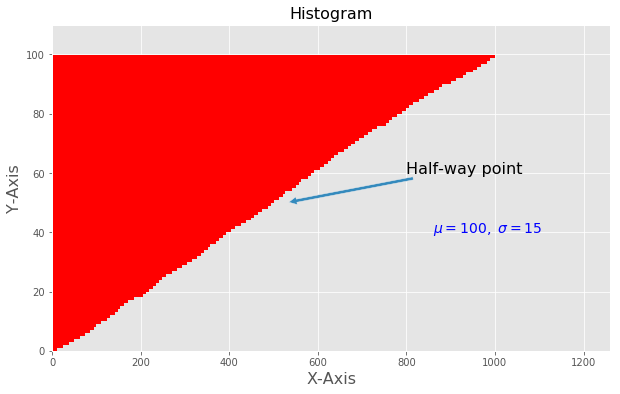

In [77]:
l = np.random.random(1000) * 100 

# Figure, size in inches
plt.figure( figsize=(10,6))

(n, bins, patches) = plt.hist( l, 100, cumulative=True, color='r', orientation='horizontal' )
plt.title('Histogram', fontsize=16)
plt.xlabel('X-Axis',fontsize=16)
plt.ylabel('Y-Axis',fontsize=16)
plt.text(860, 40.025, r'$\mu=100,\ \sigma=15$', fontsize=14, color='blue')
plt.axis([0, 1260, 0, 110.03])
plt.annotate('Half-way point', fontsize=16, xy=(530,50), xytext=(800,60), arrowprops={'arrowstyle':'simple'})


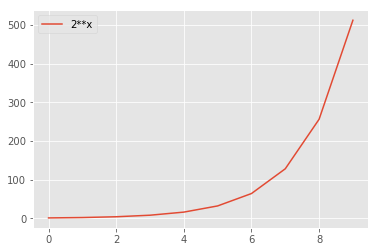

In [19]:
# Log scale axis
l = 2**np.arange(10)

plt.plot(l, label='2**x')
#plt.yscale('log')
plt.legend()
                         

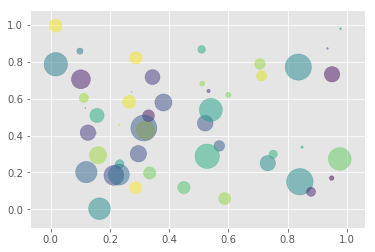

In [20]:
# %load scatter_demo.py
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
#print(x)
#print(y)
#print(area)
#print(colors)


## Example: Worldpopulation over the years

Source: ourworldindata.org

Data on the world population from 10000 BC - 2015 AC

In [21]:
# !head data/WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv
# Read in the data from the file
# Note, specify the delimiter and skip the first row... 
# arrays can only hold one type of data at a type. No strings.
data = np.loadtxt('WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv',
                 delimiter=',', skiprows=1)

In [22]:
# Let's check
data[:10]

array([[  -10000.   ,  2431214.021],
       [   -9999.   ,  2432196.403],
       [   -9998.   ,  2433179.051],
       [   -9997.   ,  2434161.964],
       [   -9996.   ,  2435145.144],
       [   -9995.   ,  2436128.589],
       [   -9994.   ,  2437112.3  ],
       [   -9993.   ,  2438096.277],
       [   -9992.   ,  2439080.521],
       [   -9991.   ,  2440065.03 ]])

In [23]:
# Get the columns separately
years, population = data.T

In [24]:
years[:5]

array([-10000.,  -9999.,  -9998.,  -9997.,  -9996.])

In [25]:
population[:5]

array([ 2431214.021,  2432196.403,  2433179.051,  2434161.964,  2435145.144])

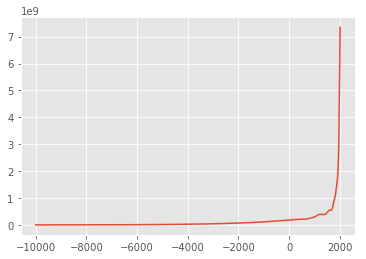

In [26]:
# Let's plot
plt.plot(years, population)

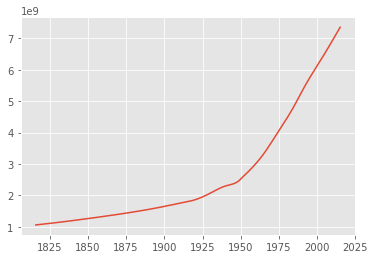

In [27]:
# Ok, zoom in on the last 2 centuries
plt.plot( years[-200:], population[-200:])

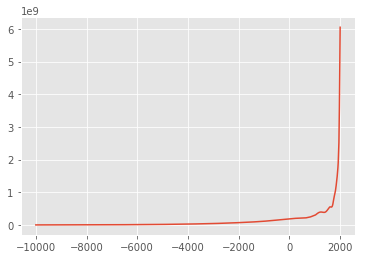

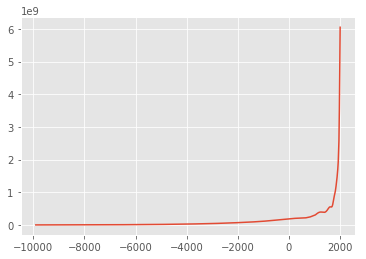

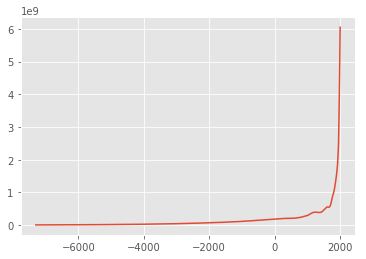

In [28]:
# Make it interactive

@interact(start=(-10000,2000,50), end=(-9000,2000,50))
def show_pop( start=-10000, end=2015 ):
    plt.plot( years[start+10000:end+10000], population[start+10000:end+10000] )

In [21]:
# Let's look at the relative growth per year

growth = population[1:] - population[:-1]
growth[:10]

array([ 982.382,  982.648,  982.913,  983.18 ,  983.445,  983.711,
        983.977,  984.244,  984.509,  984.776])

In [22]:
# Calculate the percentage growth
perc = (growth / population[:-1]) * 100
perc[:10]

array([ 0.04040706,  0.04040167,  0.04039625,  0.0403909 ,  0.04038548,
        0.04038009,  0.04037471,  0.04036937,  0.04036394,  0.0403586 ])

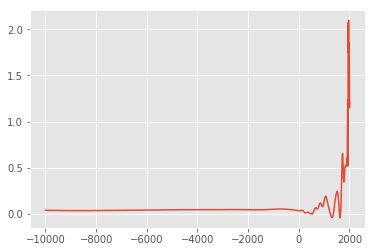

In [23]:
# Now plot it
plt.plot( years[:-1], perc )

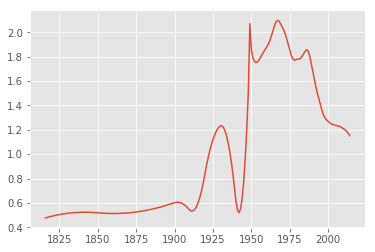

In [24]:
plt.plot( years[-200:-1], perc[-199:])

In [25]:
# So the average growth in the last 200 and 100 years was
print("Avg growth last 200 years", perc[-200:].mean())
print("Avg growth last 100 years", perc[-100:].mean())

Avg growth last 200 years 0.975906054218
Avg growth last 100 years 1.41888471428
